# TRANING THE HAND WRITTEN DIGITS MODEL


In This We Are Going To Train the Model Through 5000 Hand Written Digits
Then We will be Implement On the Data given by The USER.

IMPORTING THE LIBRARIES


In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy  as np
from skimage.transform import resize
import pandas as pd
from scipy.io import loadmat
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
# Use loadmat to load matlab files
mat=loadmat("D:/User/Desktop/ex3data1.mat")
x=mat["X"]
y=mat["y"]

In [3]:
x.shape

(5000, 400)

In [4]:
x[0].shape

(400,)

There is a mistake in the data set that is 0 is represented s 10 in the y data set.
So let's replace 10 with 0 in the data set.

In [5]:
y=pd.DataFrame(y).replace(to_replace=[10],value=[0])


In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

y=ohe.fit_transform(y).toarray()

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# OUTPUT DATA

In [8]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
x_train.shape

(4000, 400)

# DATA IS ALLREADY NORMALIZED.

In [11]:
#train_data=x_train.astype(float)/255
#test_data=x_test.astype(float)/255

Lets see how the *TRAIN DATA* Lookes like

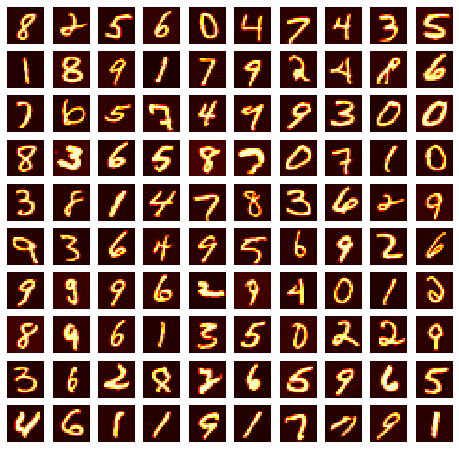

In [14]:
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(x[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

# CNN ARCHITECTURE 

In [75]:
cnn = tf.keras.models.Sequential()

In [76]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[20,20,1]))

In [77]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

In [78]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

In [79]:
cnn.add(tf.keras.layers.Flatten())

In [80]:
cnn.add(tf.keras.layers.Dense(units=40, activation='relu'))

In [81]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [82]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [83]:
cnn.fit(x = x_train.reshape([-1,20,20,1],order='F'), y=y_train,validation_data =(x_test.reshape([-1,20,20,1],order='F'),y_test), epochs = 50,batch_size=25)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 5s 1ms/sample - loss: 0.9767 - accuracy: 0.7190 - val_loss: 0.4025 - val_accuracy: 0.8690
Epoch 2/50
4000/4000 [==============================] - 3s 638us/sample - loss: 0.2790 - accuracy: 0.9197 - val_loss: 0.2596 - val_accuracy: 0.9150
Epoch 3/50
4000/4000 [==============================] - 3s 650us/sample - loss: 0.2001 - accuracy: 0.9405 - val_loss: 0.2327 - val_accuracy: 0.9260
Epoch 4/50
4000/4000 [==============================] - 2s 590us/sample - loss: 0.1561 - accuracy: 0.9560 - val_loss: 0.1999 - val_accuracy: 0.9340
Epoch 5/50
4000/4000 [==============================] - 3s 627us/sample - loss: 0.1359 - accuracy: 0.9597 - val_loss: 0.1760 - val_accuracy: 0.9480
Epoch 6/50
4000/4000 [==============================] - 3s 636us/sample - loss: 0.1059 - accuracy: 0.9688 - val_loss: 0.1876 - val_accuracy: 0.9450
Epoch 7/50
4000/4000 [==============================] - 3s 639us/s

# ACCURACY ON TEST SET: 96.4%

In [87]:
##cnn.save('Hand_Written.h5',overwrite=False)